In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("tensorflow version" , tf.__version__)
print("tensorflow hub version" , hub.__version__)


tensorflow version 2.13.0
tensorflow hub version 0.14.0


In [ ]:
print("GPU" , "available" if tf.config.list_physical_devices("GPU") else "no")

GPU available


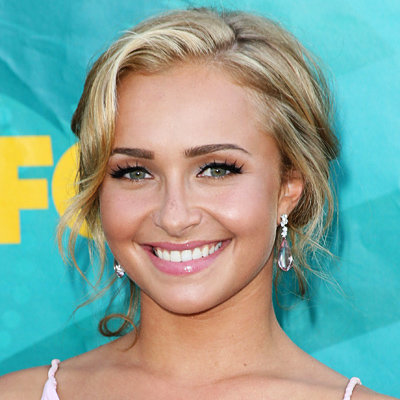

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/FaceShape/training_set/heart (663).jpg" , width = 200 , height = 200 )


In [ ]:
import os


In [ ]:
folder_path = '/content/drive/MyDrive/FaceShape/training_set/Heart/'
file_names = os.listdir(folder_path)

import pandas as pd
heart_df = pd.DataFrame({'File_Name': file_names})

heart_df["Type"] = "Heart"
# Create pathnames from image ID's
filenames = ["drive/My Drive/FaceShape/training_set/Heart/" + fname for fname in heart_df["File_Name"]]

# Check the first 10
filenames[:10]
heart_1 = pd.DataFrame({'File_Name': filenames , 'Shape' : 'Heart'})
csv_filename = '/content/drive/MyDrive/FaceShape/training_set/Heart.csv'
heart_1.to_csv(csv_filename, index=False)


FileNotFoundError: ignored

In [ ]:
heart_1 = pd.read_csv("/content/drive/MyDrive/FaceShape Dataset/training_set/Heart.csv")

In [ ]:
folder_path = '/content/drive/MyDrive/FaceShape Dataset/testing_set/Square/'
file_names = os.listdir(folder_path)

import pandas as pd
Square_df = pd.DataFrame({'File_Name': file_names})

# Create pathnames from image ID's
filenames = ["drive/My Drive/FaceShape Dataset/testing_set/Square/" + fname for fname in Square_df["File_Name"]]

# Check the first 10
filenames[:10]
Square_1 = pd.DataFrame({'File_Name': filenames , 'Shape' : 'Square'})
csv_filename = '/content/drive/MyDrive/FaceShape Dataset/testing_set/Square.csv'
Square_1.to_csv(csv_filename, index=False)


In [ ]:
Square_1

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
labels_csv = pd.read_csv("/content/drive/MyDrive/FaceShape/Training_label.csv")
labels = labels_csv["Shape"].to_numpy()
labels

array(['Heart', 'Heart', 'Heart', ..., 'Square', 'Square', 'Square'],
      dtype=object)

In [ ]:
unique_breeds = np.unique(labels)
boolean_labels = []

for label in labels :
    boolean_labels.append(label == unique_breeds)

In [ ]:
unique_breeds

array(['Heart', 'Oblong', 'Oval', 'Round', 'Square'], dtype=object)

In [ ]:
filenames = labels_csv["File_Name"]
boolean_labels[:2]


[array([ True, False, False, False, False]),
 array([ True, False, False, False, False])]

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

1000

In [ ]:
from sklearn.model_selection import train_test_split
X = filenames
Y = boolean_labels
X_train , X_val , Y_train , Y_val = train_test_split(X[:NUM_IMAGES] , Y[:NUM_IMAGES] , test_size = 0.2 , random_state = 42 )
len(X_train)

800

In [ ]:
X_train[0]

'drive/My Drive/FaceShape/training_set/heart (100).jpg'

In [ ]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  # Read an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [ ]:
def get_image_label (image_path , label):
    return process_image(image_path) , label

In [ ]:
get_image_label(X[42] , Y[42] )

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.93171626, 0.888579  , 0.8807359 ],
         [0.9281932 , 0.88505596, 0.8772128 ],
         [0.92549026, 0.882353  , 0.8745099 ],
         ...,
         [0.90214735, 0.8707748 , 0.86293167],
         [0.90196085, 0.8705883 , 0.86274517],
         [0.90196085, 0.8705883 , 0.86274517]],
 
        [[0.92331064, 0.8801734 , 0.87233025],
         [0.92364633, 0.8805091 , 0.87266594],
         [0.92549026, 0.882353  , 0.8745099 ],
         ...,
         [0.9002284 , 0.8753947 , 0.86537194],
         [0.8997812 , 0.87494755, 0.8649248 ],
         [0.8997812 , 0.87494755, 0.8649248 ]],
 
        [[0.9215687 , 0.87843144, 0.8705883 ],
         [0.92161316, 0.8784759 , 0.87063277],
         [0.92185754, 0.8787203 , 0.87087715],
         ...,
         [0.901672  , 0.88206416, 0.87029946],
         [0.901672  , 0.88206416, 0.87029946],
         [0.8982258 , 0.87861794, 0.86685324]],
 
        ...,
 
        [[0.8126787 , 0.7309876 

In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
train_data = create_data_batches(X_train , Y_train)
val_data = create_data_batches(X_val , Y_val , valid_data = True)

Creating training data batches...
Creating validation data batches...


In [ ]:
import matplotlib.pyplot as plt
def show_25_images(images, labels):
    plt.figure(figsize=(8, 8))
    for i in range(25):
        ax = plt.subplot(5, 5, i+1)
        plt.imshow(images[i])
        plt.title(unique_breeds[labels[i].argmax()])
        plt.axis("off")
#   return


In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
# show_25_images(train_images, train_labels)

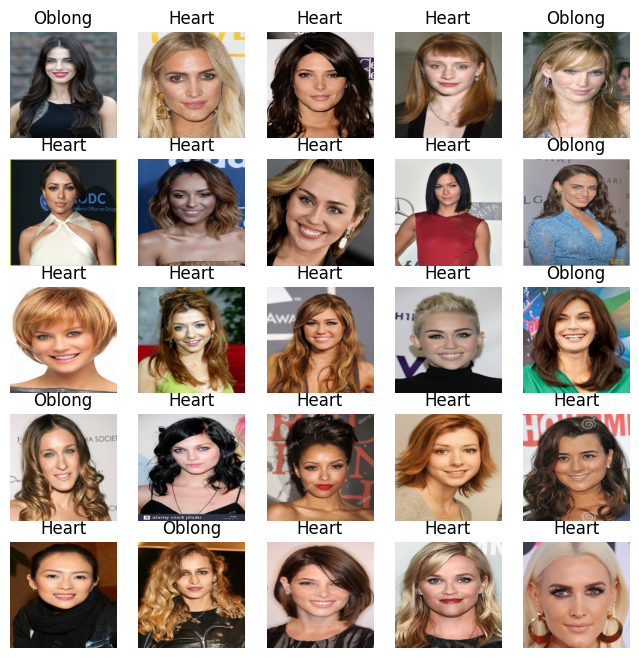

In [ ]:
show_25_images(train_images, train_labels)


In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = 5

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [ ]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 5)                 5010      
                                                                 
Total params: 5437723 (20.74 MB)
Trainable params: 5010 (19.57 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [ ]:
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
import datetime

def create_tensorboard_callback():
    logdir = os.path.join("drive/MyDrive/FaceShape/logdir" , datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy" , patience = 3)

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
def train_model():
    model = create_model()
    tensorboard = create_tensorboard_callback()
    model.fit(x=train_data ,
              epochs = NUM_EPOCHS,
              validation_data = val_data,
              validation_freq = 1,
              callbacks=[tensorboard ])
    return model

In [ ]:
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
16/25 [==================>...........] - ETA: 1s - loss: 1.0654 - accuracy: 0.6406

KeyboardInterrupt: ignored

In [ ]:
%tensorboard --logdir drive/MyDrive/FaceShape

In [ ]:
# from struct import unpack
# from tqdm import tqdm
# import os


# marker_mapping = {
#     0xffd8: "Start of Image",
#     0xffe0: "Application Default Header",
#     0xffdb: "Quantization Table",
#     0xffc0: "Start of Frame",
#     0xffc4: "Define Huffman Table",
#     0xffda: "Start of Scan",
#     0xffd9: "End of Image"
# }


# class JPEG:
#     def __init__(self, image_file):
#         with open(image_file, 'rb') as f:
#             self.img_data = f.read()

#     def decode(self):
#         data = self.img_data
#         while(True):
#             marker, = unpack(">H", data[0:2])
#             # print(marker_mapping.get(marker))
#             if marker == 0xffd8:
#                 data = data[2:]
#             elif marker == 0xffd9:
#                 return
#             elif marker == 0xffda:
#                 data = data[-2:]
#             else:
#                 lenchunk, = unpack(">H", data[2:4])
#                 data = data[2+lenchunk:]
#             if len(data)==0:
#                 break


# bads = []

# for img in tqdm(X):
# #   image = os.join(root_img,img)
#   image = JPEG(img)
#   try:
#     image.decode()
#   except:
#     bads.append(img)


# # for name in bads:
# #   os.remove(osp.join(root_img,name))

In [ ]:
# bads

In [ ]:
# for name in issue_files:
#   os.remove(name)

In [ ]:
# import pandas as pd

# # Load the CSV file into a DataFrame
# csv_file_path = '/content/drive/MyDrive/FaceShape/Training_label.csv'
# df = pd.read_csv(csv_file_path)

# # List of filenames to remove
# # filenames_to_remove = ['filename1.jpg', 'filename2.jpg', 'filename3.jpg']

# # Filter the DataFrame to exclude rows with filenames to remove
# df = df[~df['File_Name'].isin(issue_files)]

# # Save the updated DataFrame back to the CSV file
# df.to_csv(csv_file_path, index=False)


In [ ]:
# csv_file_path = '/content/drive/MyDrive/FaceShape/Training_label.csv'
# df = pd.read_csv(csv_file_path)


In [ ]:
# len(df)

In [ ]:
predictions = model.predict(val_data , verbose = 1)

In [ ]:
index = 199
print(f"Predicted_label : {unique_breeds[np.argmax(predictions[index])]}")
np.argmax(predictions[index])

In [ ]:
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
# val_images, val_labels = unbatchify(val_data)
# val_images[0], val_labels[0]

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)


In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

NameError: ignored

In [ ]:
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

NameError: ignored

In [ ]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/MyDrive/FaceShape/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path


In [ ]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model


In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

In [ ]:
loaded_1000_image_model = load_model('drive/My Drive/FaceShape/models/20231004-10531696416784-1000-images-mobilenetv2-Adam.h5')


Loading saved model from: drive/My Drive/FaceShape/models/20231004-10531696416784-1000-images-mobilenetv2-Adam.h5


In [ ]:
model.evaluate(val_data)

In [ ]:
loaded_1000_image_model.evaluate(val_data)

In [ ]:
len(X) , len(Y)

(3993, 3993)

In [ ]:
full_data = create_data_batches(X,Y)

Creating training data batches...


In [ ]:
len(full_data)

125

In [ ]:
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
full_model_tensorboard = create_tensorboard_callback()
# full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "accuracy" , patience = 3)

In [ ]:
full_model.fit(x=full_data,
               epochs = NUM_EPOCHS,
               callbacks = [full_model_tensorboard ])

Epoch 1/100
125/125 [==============================] - 689s 5s/step - loss: 1.6972 - accuracy: 0.3135
Epoch 2/100
125/125 [==============================] - 26s 212ms/step - loss: 1.4275 - accuracy: 0.4127
Epoch 3/100
125/125 [==============================] - 26s 210ms/step - loss: 1.3799 - accuracy: 0.4323
Epoch 4/100
125/125 [==============================] - 26s 208ms/step - loss: 1.2957 - accuracy: 0.4761
Epoch 5/100
125/125 [==============================] - 26s 211ms/step - loss: 1.2601 - accuracy: 0.4899
Epoch 6/100
125/125 [==============================] - 26s 210ms/step - loss: 1.2354 - accuracy: 0.5031
Epoch 7/100
125/125 [==============================] - 26s 210ms/step - loss: 1.2172 - accuracy: 0.5144
Epoch 8/100
125/125 [==============================] - 27s 214ms/step - loss: 1.2032 - accuracy: 0.5131
Epoch 9/100
125/125 [==============================] - 27s 214ms/step - loss: 1.1769 - accuracy: 0.5289
Epoch 10/100
125/125 [==============================] - 27s 212ms/

In [ ]:
save_model(full_model, suffix="full-image-set-2-mobilenetv2-Adam")

Saving model to: drive/MyDrive/FaceShape/models/20231004-15451696434346-full-image-set-2-mobilenetv2-Adam.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/MyDrive/FaceShape/models/20231004-15451696434346-full-image-set-2-mobilenetv2-Adam.h5'

In [ ]:
# import tensorflow as tf

# def load_image(image_path):
#     try:
#         if image_path.endswith('.gif'):
#             # Process GIFs using tf.io.decode_gif
#             image = tf.io.decode_gif(tf.io.read_file(image_path))[0]  # Assuming a single frame GIF
#         else:
#             # Process regular images using tf.io.decode_jpeg or tf.io.decode_png
#             image = tf.io.decode_jpeg(tf.io.read_file(image_path))
#         return image
#     except Exception as e:
#         print(f"Error loading image: {image_path}")
#         print(f"Error message: {str(e)}")
#         return None

# # Example usage:
# image_paths = filenames  # Replace with your list of image file paths
# issue_files = []

# for image_path in image_paths:
#     loaded_image = load_image(image_path)
#     if loaded_image is None:
#         # Handle the error or skip problematic files as needed
#         issue_files.append(image_path)  # Add the problematic file to the issue_files list

# # Now, issue_files contains the filenames of files causing issues
# print("Files causing issues:", issue_files)


Error loading image: drive/My Drive/FaceShape/training_set/oblong (724).jpg
Error message: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Got 11 frames, but animated gifs can only be decoded by tf.io.decode_gif or tf.io.decode_image [Op:DecodeJpeg]
Files causing issues: ['drive/My Drive/FaceShape/training_set/oblong (724).jpg']


In [ ]:
# issue_files

['drive/My Drive/FaceShape/training_set/oblong (724).jpg']

In [ ]:
loaded_full_model = load_model('drive/My Drive/FaceShape/models/20231004-15451696434346-full-image-set-2-mobilenetv2-Adam.h5')


Loading saved model from: drive/My Drive/FaceShape/models/20231004-15451696434346-full-image-set-2-mobilenetv2-Adam.h5


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import os
import numpy as np
import pandas as pd
print("tensorflow version" , tf.__version__)
print("tensorflow hub version" , hub.__version__)

# Define image size
IMG_SIZE = 224

def process_image(image_path):
  # Read an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

def get_image_label (image_path , label):
    return process_image(image_path) , label


# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch


import matplotlib.pyplot as plt
def show_25_images(images, labels):
    plt.figure(figsize=(8, 8))
    for i in range(25):
        ax = plt.subplot(5, 5, i+1)
        plt.imshow(images[i])
        plt.title(unique_breeds[labels[i].argmax()])
        plt.axis("off")
#   return




def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
# val_images, val_labels = unbatchify(val_data)
# val_images[0], val_labels[0]

def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]




# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/MyDrive/FaceShape/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path





# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model


tensorflow version 2.13.0
tensorflow hub version 0.14.0


In [ ]:
# custom_path = "drive/My Drive/FaceShape/testing_set/heart (197).jpg"
# custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_paths = []
custom_image_paths.append("drive/My Drive/FaceShape/testing_set/heart (892).jpg")
custom_image_paths.append("drive/My Drive/FaceShape/testing_set/heart (913).jpg")
custom_image_paths.append("drive/My Drive/FaceShape/testing_set/heart (986).jpg")
custom_image_paths.append("drive/My Drive/FaceShape/testing_set/oblong (26).jpg")
custom_image_paths.append("drive/My Drive/FaceShape/testing_set/oblong (147).jpg")
custom_image_paths.append("drive/My Drive/FaceShape/testing_set/oblong (156).jpg")
loaded_full_model = load_model('drive/My Drive/FaceShape/models/20231004-15451696434346-full-image-set-2-mobilenetv2-Adam.h5')
data = tf.data.Dataset.from_tensor_slices((tf.constant(custom_image_paths))) # only filepaths (no labels)
custom_data = data.map(process_image).batch(32)
custom_preds = loaded_full_model.predict(custom_data)
unique_breeds = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
custom_pred_labels = [unique_breeds[np.argmax(custom_preds[i])] for i in range(len(custom_preds))]


In [ ]:
# custom_image_paths = []
data = tf.data.Dataset.from_tensor_slices((tf.constant(custom_image_paths))) # only filepaths (no labels)
custom_data = data.map(process_image).batch(32)
custom_preds = loaded_full_model.predict(custom_data)
unique_breeds = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
custom_pred_labels = [unique_breeds[np.argmax(custom_preds[i])] for i in range(len(custom_preds))]


1/1 [==============================] - 0s 88ms/step


In [ ]:
custom_pred_labels

['Square',
 'Round',
 'Oblong',
 'Round',
 'Oval',
 'Oblong',
 'Oblong',
 'Oblong',
 'Heart',
 'Oblong']

In [ ]:
data = tf.data.Dataset.from_tensor_slices((tf.constant(custom_image_paths))) # only filepaths (no labels)
custom_data = data.map(process_image).batch(BATCH_SIZE)

In [ ]:
custom_image_paths[0]

'drive/My Drive/FaceShape/testing_set/heart (892).jpg'

In [ ]:
# Turn custom images into batch datasets
# custom_data = create_data_batches(custom_image_paths, test_data=True)
# custom_data = custom_image_paths

Creating test data batches...


In [ ]:
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 0s 175ms/step


In [ ]:
custom_preds.shape

(10, 5)

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['Square',
 'Round',
 'Oblong',
 'Round',
 'Oval',
 'Oblong',
 'Oblong',
 'Oblong',
 'Heart',
 'Oblong']

In [ ]:
# Get custom images (our unbatchify() function won't work since there aren't labels... maybe we could fix this later)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

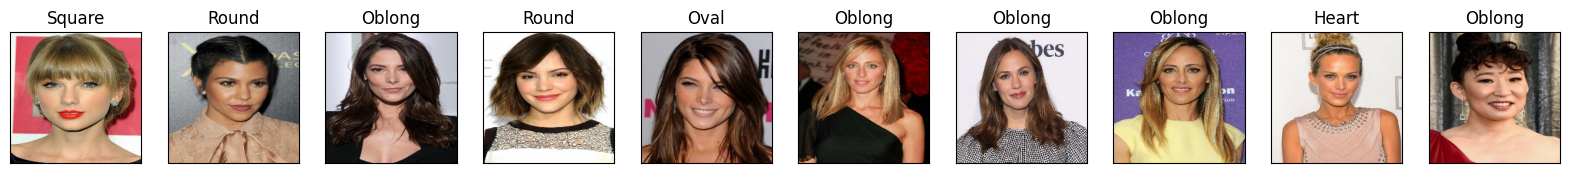

In [ ]:
# Check custom image predictions
plt.figure(figsize=(20, 20))
for i, image in enumerate(custom_images):
  plt.subplot(1, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)